# Laboratorio de regresión - 3

## Significancia de factores

|                |   |
:----------------|---|
| **Nombre**     Valeria Estefanía Milke Loera|   |
| **Fecha**     03-02-2026 |   |
| **Expediente** 739228|   |

Descarga el archivo de publicidad y carga los datos (Advertising.csv).

In [1]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\valer\Advertising.csv")
df.head(20)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


**¿Hay alguna relación entre el presupuesto para publicidad y las ventas?**

Nuestra primera meta debe ser determinar si hay evidencia en los datos de que haya una asociación entre estas variables.

- ¿Por qué? ¿Qué resultaría si nos diéramos cuenta de la falta de relación entre el presupuesto de publicidad y las ventas?

A partir de la siguiente gráfica, se observa que existe evidencia de una relación entre el presupuesto destinado a publicidad y las ventas, ya que al aumentar la inversión en ciertos medios, las ventas tienden a incrementar. Identificar esta relación es importante porque, en caso de no existir, la publicidad no sería un factor relevante para explicar el comportamiento de las ventas, lo que indicaría que otros factores externos estarían influyendo en el desempeño de la empresa.

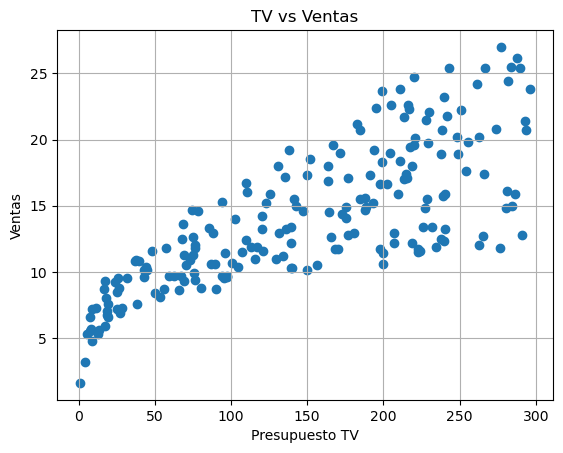

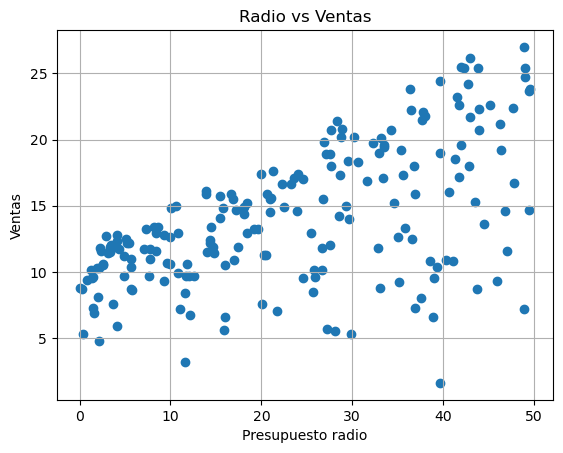

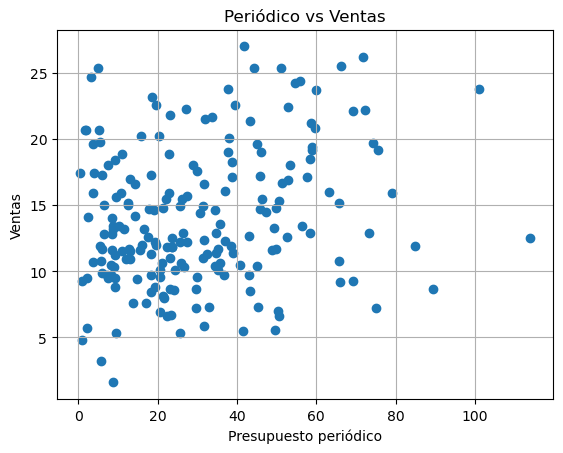

In [3]:
plt.figure(); plt.grid()
plt.scatter(df["TV"], df["sales"])
plt.xlabel("Presupuesto TV")
plt.ylabel("Ventas")
plt.title("TV vs Ventas")
plt.show()
####
plt.figure(); plt.grid()
plt.scatter(df["radio"], df["sales"])
plt.xlabel("Presupuesto radio")
plt.ylabel("Ventas")
plt.title("Radio vs Ventas")
plt.show()
####
plt.figure(); plt.grid()
plt.scatter(df["newspaper"], df["sales"])
plt.xlabel("Presupuesto periódico")
plt.ylabel("Ventas")
plt.title("Periódico vs Ventas")
plt.show()

**¿Qué tan fuerte es esta relación?**
Asumiendo que existe esta relación, ¿nos sirve conocer el impacto que tiene invertir en publicidad en las ventas?

La relación entre el presupuesto de publicidad y las ventas puede considerarse de moderada a fuerte, dependiendo del medio utilizado, ya que algunos canales muestran una mayor capacidad para explicar las ventas. Conocer la magnitud de esta relación es útil porque permite estimar el impacto que tiene invertir en publicidad sobre las ventas, facilitando la toma de decisiones y la asignación eficiente del presupuesto hacia los medios que generan mayor retorno.

**¿Cuáles medios están asociados con las ventas? ¿Qué tan grande es la asociación entre un medio específico y las ventas?**

Hay 3 medios distintos en los datos. ¿Sirve invertir en los 3? ¿Conviene más invertir sólo en uno?

**¿Qué tan seguros estamos de que podríamos predecir ventas futuras?**

**¿La relación es lineal?**

**¿Hay sinergia entre estos medios?**

Puede ser que gastar \\$50,000 en publicidad y otros \\$50,000 en radio es mejor opción que gastar \\$100,000 en televisión. A esto le llamamos efecto de interacción.

Podemos usar regresión lineal para responder todas estas preguntas.

Realiza una regresión lineal:

$$ \text{ventas} \approx \beta_0 + (\beta_1)(\text{TV})$$

In [4]:
y = df['sales'].values.reshape(-1,1)

In [5]:
x = df['TV'].values.reshape(-1,1)

In [6]:
lr = LinearRegression()
lr.fit(x,y)

LinearRegression()

In [7]:
b0 = lr.intercept_
b0

array([7.03259355])

In [8]:
b1 = lr.coef_
b1 

array([[0.04753664]])

**Regresión lineal**

y = 7.032593549127693 + 0.04753664x

### Verificando la precisión de nuestros coeficientes estimados

Recuerda que en el mundo real hay ruidos y errores de medición. Siempre se asume que la verdadera relación entre $X$ y $Y$ es $$Y = \beta_0 + \beta_1 X + \epsilon$$

Se asume que el término de error es independiente de $X$ (el error siempre es el mismo sin importar el valor de $X$). Este modelo describe a la *línea de regresión de la población*, que es la mejor aproximación de la verdadera relación entre $X$ y $Y$. Cuando usamos mínimos cuadrados encontramos la *línea de mínimos cuadrados*.

¿Cuál es la diferencia entre población y muestra?

La población se refiere al conjunto total de observaciones de interés. En cambio, la muestra es un subconjunto de la población que se utiliza para realizar un análisis cuando no es posible observar a toda la población y a partir de la muestra se estiman los parámetros del modelo. 
_________

¿Cuál crees que sea la diferencia entre hacer una regresión con todos los datos de la población y una muestra de ella?

La principal diferencia es que al realizar una regresión con todos los datos de la población se obtienen los parámetros verdaderos del modelo, sin error. En contraste, cuando se utiliza una muestra, los coeficientes pueden variar dependiendo de las observaciones que incluyan y están sujetos al error muestral. Es decir, la regresión a partir de una muestra proporciona solo una aproximación de la relación real entre las variables.
__________

La línea de regresión de la población no se puede observar. El concepto de comparar estas líneas es una extensión natural del acercamiento estadístico estándar de usar información de una muestra para estimar características de una población grande.

Imagina que quieres encontrar la altura promedio de un mexicano $\mu$. Medir a todos y cada uno de los mexicanos en situaciones similares, con la misma regla, mismo operador, y otras incontables formas de minimizar la variación de la medida es una tarea imposible. Lo que podemos asumir es que $\hat{\mu} = \bar{y}$. La media poblacional y la media muestral son diferentes, pero la media muestral es usualmente un buen estimado.

De la misma manera, como no contamos con el 100% de la información para hacer una regresión, los coeficientes $\beta_0$ y $\beta_1$ son desconocidos. Podemos estimarlos usando mínimos cuadrados, encontrando $\hat{\beta_0}$ y $\hat{\beta_1}$. Puede que las muestras que tengamos en ese momento estén un poco por encima de la media, pero otras muestras en otro momento puede que estén debajo de la media. En general, esperamos que el promedio de las aproximaciones $\hat{\mu}$ aproxime a $\mu$.

Esto lleva a la pregunta: ¿qué tan cercanos son nuestros coeficientes estimados a los verdaderos coeficientes? Utilizamos el concepto de error estándar para evaluar esto.

$$ \text{Var}(\hat{\mu})=\text{SE}(\hat{\mu})^2 = \frac{\sigma^2}{n} $$

Donde $\sigma$ es la desviación estándar de cada una de las observaciones $y_i$ de $Y$. El error estándar nos dice la cantidad promedio que el estimado difiere del valor verdadero. Podemos ver en la fórmula que entre más observaciones tengamos el error se hace más pequeño. Las fórmulas para errores estándar de $\hat{\beta_0}$ y $\hat{\beta_1}$ son:

$$ \text{SE}(\hat{\beta_0})^2 = \sigma^2 [\frac{1}{n} + \frac{\bar{x}^2}{\sum_{i=1}^n (x_i - \bar{x})^2}]$$

$$ \text{SE}(\hat{\beta_1})^2 = \frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x})^2}$$

$$ \sigma^2 = \text{Var}(\epsilon) = \text{RSE}^2 = \frac{\text{RSS}}{n-p}$$

Para que estas fórmulas sean validas asumimos que los errores $\epsilon_i$ tienen varianza común $\sigma^2$ y que no están correlacionados.

Calcula los errores estándar de los coeficientes

In [9]:
ypred = lr.predict(x)
residuos = y - ypred

In [10]:
rss = np.sum(residuos**2)

In [11]:
n = len(y)
p = 2
sigma2 = rss / (n - p)

In [12]:
promx = np.mean(x)
sumatoria = np.sum((x - promx)**2)

In [13]:
seb0 = np.sqrt(sigma2*((1/n)+(promx)**2/sumatoria))

In [14]:
seb1 = np.sqrt(sigma2/sumatoria)

In [15]:
print("B0 =", b0)
print("B1 =", b1)

print("SE(B0) =", seb0)
print("SE(B1) =", seb1)

B0 = [7.03259355]
B1 = [[0.04753664]]
SE(B0) = 0.4578429402734785
SE(B1) = 0.0026906071877968707


Estos errores se pueden usar para calcular intervalos de confianza. Un intervalo de confianza del $95\%$ se define como un rango de valores en el cuál se encuentra el desconocido valor verdadero con un $95\%$ de probabilidad.

Otra forma de verlo es que si tomamos muestras repetidas y construimos un intervalo de confianza para cada una, el $95\%$ de los intervalos creados van a contener el valor verdadero. Para la regresión el intervalo de confianza del $95\%$ toma la forma:

$$ \hat{\beta_j} \pm 2\text{SE}(\hat{\beta_j})$$

Calcula los intervalos de confianza para los coeficientes estimados:

**Intervalo de confianza de B0**

In [17]:
li0 = b0 - 2*seb0
ls0 = b0 + 2*seb0
print("El intervalo de confianza de B0 es:[",li0,",",ls0,"]")

El intervalo de confianza de B0 es:[ [6.11690767] , [7.94827943] ]


In [18]:
li1 = b1 - 2*seb1
ls1 = b1 + 2*seb1
print("El intervalo de confianza de B1 es:[",li1,",",ls1,"]")

El intervalo de confianza de B1 es:[ [[0.04215543]] , [[0.05291785]] ]


Los errores estándar también se usan para realizar pruebas de hipótesis. La prueba de hipótesis más común es probar la hipótesis nula de:

$$ H_0: \text{No hay relación entre } X \text{ y } Y \ \ \ \ (\beta_1=0)$$

contra la hipótesis alternativa:
$$ H_1: \text{Hay alguna relación entre } X \text{ y } Y \ \ \ (\beta_1 \neq 0)$$

Explica con tus palabras el significado de la hipótesis nula y la hipótesis alternativa.

La hipótesis nula establece que no existe relación entre X y Y, es decir, que el coeficiente B1 es igual a cero. La hipótesis alternativa plantea que sí existe una relación, o sea que B1 es distinto de cero. En este caso, el intervalo de confianza nos indica que B1 pase por 0 y que por ende exista la posibilidad de que sí sea cero, pero se hace una prueba de hipótesis para determinar si esto fue una coincidencia derivada de los valores de la muestra o en efecto B1 no es cero y sí existe una relación entre "x" y "y".
__________

Para probal la hipótesis nula debemos determinar si nuestro estimado $\hat{\beta_1}$ de $\beta_1$ está lo suficientemente alejado de cero para que podamos decir con confianza que este valor no es cero. 

¿Qué tan lejos? Depende de qué tanta confianza tengamos en el estimado encontrado. Si nuestro error estándar es pequeño y nuestro estimado está alejado de cero podríamos decir que hay muy poca probabilidad de que el valor verdadero sea 0. En cambio, si nuestro error estándar es grande y nuestro estimado está muy cerca de cero, entonces podrías ser que el valor verdadero sea cero y que no haya relación entre las variables.

Se calcula un *estadístico t* dado por
$$ t = \frac{\hat{\beta_j} - \mu}{\text{SE}(\hat{\beta_j})} $$

donde $\mu$ es el valor contra el que queremos probar.

Calcula el estadístico t para tus coeficientes estimados, usando como referencia la prueba de hipótesis.

In [19]:
t0 = (b0 - 0)/seb0
t1 = (b1-0)/seb1
print("t(B0) =", t0)
print("t(B1) =", t1)

t(B0) = [15.36027517]
t(B1) = [[17.6676256]]


La distribución t tiene forma de campana y se parece bastante a la distribución normal cuando $n > 30$. Ya sólo es cuestión de calcular la probabilidad de observar cualquier número tal que su valor absoluto sea igual o mayor que el valor absoluto del estadístico t calculado. En otras palabras:
$$ P(|x| \geq |t|) $$

A esta probabilidad la llamamos *p-value*. Un *p-value* pequeño indica que es poco probable que exista por puro azar una relación significativa entre predictor y respuesta, en caso de que no haya una asociación real entre predictor y respuesta. En otras palabras, el *p-value* te dice la probabilidad de que parezca que hay relación cuando no la hay.

Si el *p-value* es pequeño, inferimos que sí hay una asociación entre el predictor y la respuesta, y **rechazamos la hipótesis nula**.
  

¿Qué tan pequeño? Depende de la aplicación. Un valor muy común es del $5\%$.

Utiliza el siguiente código para calcular el *p-value* para tus coeficientes

`from scipy import stats`

`p_bj = 2*(1 - stats.t.cdf(np.abs(t_bj), n-p))`

In [20]:
from scipy import stats

In [21]:
p0 = 2*(1-stats.t.cdf(np.abs(t0),n-p))
p0

array([0.])

In [22]:
p1 = 2*(1-stats.t.cdf(np.abs(t1),n-p))
p1

array([[0.]])

¿Se rechaza la hipótesis nula? ¿Qué significa?

Como el p-value es extremadamente pequeño se rechaza la hipótesis nula. Esto significa que existe muy poca probabilidad de que la relación entre "x" y "y" se deba al azar y existe evidencia estadística para decir que sí hay relación entre el gasto en la publicidad en la tele y las ventas. 
__________________________

Realiza otras dos regresiones. Ya tienes hecha la regresión de ventas dado el gasto en publicidad de TV. Realiza la regresión para gastos en radio y gastos en periódico. Organiza las respuestas para que debajo de esta celda se tenga:
- Título de regresión
- Coeficientes estimados
- Errores estándar de los coeficientes
- Intervalos de confianza
- Estadísticos t
- p-values
- Observaciones

***Regresión lineal de gastos en radio***

In [23]:
yr = df["sales"].values.reshape(-1,1)
xr = df["radio"].values.reshape(-1,1)

In [24]:
lrr = LinearRegression()
lrr.fit(xr,yr)

LinearRegression()

In [25]:
b0r = lrr.intercept_
b0r

array([9.3116381])

In [26]:
b1r = lrr.coef_
b1r

array([[0.20249578]])

**Coeficientes estimados**

y = 9.3116381 + 0.20249578x

**Error estándar de los coeficientes**

In [27]:
yrpred = lrr.predict(xr)
residuosr = yr - yrpred

rssr = np.sum(residuosr**2)

nr = len(yr)
pr = 2
sigma2r = rssr / (nr - pr)
promxr = np.mean(xr)
sumatoriar = np.sum((xr - promxr)**2)

seb0r = np.sqrt(sigma2r*((1/nr)+(promxr)**2/sumatoriar))
seb1r = np.sqrt(sigma2r/sumatoriar)
print("B0 =", b0r)
print("B1 =", b1r)
print("SE(B0) =", seb0r)
print("SE(B1) =", seb1r)

B0 = [9.3116381]
B1 = [[0.20249578]]
SE(B0) = 0.5629004962718711
SE(B1) = 0.020411306360090635


**Intervalo de confianza**

In [28]:
li0r = b0r - 2*seb0r
ls0r = b0r + 2*seb0r
print("El intervalo de confianza de B0 es:[",li0r,",",ls0r,"]")

El intervalo de confianza de B0 es:[ [8.1858371] , [10.43743909] ]


In [29]:
li1r = b1r - 2*seb1r
ls1r = b1r + 2*seb1r
print("El intervalo de confianza B1 es:[",li1r,",",ls1r,"]")

El intervalo de confianza B1 es:[ [[0.16167317]] , [[0.2433184]] ]


**Prueba de hipótesis**

$$ H_0: \text{No hay relación entre los gastos de publicidad en radio} \text{ y las ventas} \ \ \ \ (\beta_1=0)$$
$$ H_1: \text{Hay alguna relación entre los gastos de publicidad en radio} \text{ y las ventas} \ \ \ (\beta_1 \neq 0)$$

**Estadístico t**

In [30]:
t0r = b0r/seb0r
t1r = b1r/seb1r
print("t(B0) =", t0r)
print("t(B1) =", t1r)

t(B0) = [16.54224531]
t(B1) = [[9.92076547]]


**p-values**

In [31]:
p0r = 2*(1-stats.t.cdf(np.abs(t0r),nr-pr))
p0r

array([0.])

In [32]:
p1r = 2*(1-stats.t.cdf(np.abs(t1r),nr-pr))
p1r

array([[0.]])

**Observaciones**

Como el p-value es extremadamente pequeño (casi cero), se rechaza la hipótesis nula. Esto significa que existe muy poca probabilidad de que la relación entre la publicidad en el radio y las ventas se deba al azar y existe evidencia estadística para decir que sí hay relación entre ambas variables. 
________

***Regresión lineal de gastos en periódico***

In [33]:
yn = df["sales"].values.reshape(-1,1)
xn = df["newspaper"].values.reshape(-1,1)

In [34]:
lrn = LinearRegression()
lrn.fit(xn,yn)

LinearRegression()

In [35]:
b0n = lrn.intercept_
b0n

array([12.35140707])

In [36]:
b1n = lrn.coef_
b1n

array([[0.0546931]])

**Coeficientes estimados**

y = 12.35140707 + 0.0546931x
________

**Error estándar de los coeficientes**

In [40]:
ynpred = lrn.predict(xn)
residuosn = yn - ynpred

rssn = np.sum(residuosn**2)

nn = len(yn)
pn = 2
sigma2n = rssn / (nn - pn)
promxn = np.mean(xn)
sumatorian = np.sum((xn - promxn)**2)

seb0n = np.sqrt(sigma2n*((1/nn)+(promxn)**2/sumatorian))
seb1n = np.sqrt(sigma2n/sumatorian)
print("B0 =", b0n)
print("B1 =", b1n)
print("SE(B0) =", seb0n)
print("SE(B1) =", seb1n)

B0 = [12.35140707]
B1 = [[0.0546931]]
SE(B0) = 0.6214201876094345
SE(B1) = 0.016575721876358165


**Intervalo de confianza**

In [38]:
li0n = b0n - 2*seb0n
ls0n = b0n + 2*seb0n
print("El intervalo de confianza de B0 es:[",li0n,",",ls0n,"]")

El intervalo de confianza es:[ [8.1858371] , [10.43743909] ]


In [41]:
li1n = b1n - 2*seb1n
ls1n = b1n + 2*seb1n
print("El intervalo de confianza B1 es:[",li1n,",",ls1n,"]")

El intervalo de confianza B1 es:[ [[0.02154165]] , [[0.08784454]] ]


**Prueba de hipótesis**

$$ H_0: \text{No hay relación entre los gastos de publicidad en el periódico} \text{ y las ventas} \ \ \ \ (\beta_1=0)$$
$$ H_1: \text{Hay alguna relación entre los gastos de publicidad en el periódico} \text{ y las ventas} \ \ \ (\beta_1 \neq 0)$$

**Estadístico t**

In [43]:
t0n = b0n/seb0n
t1n = b1n/seb1n
print("t(B0) =", t0n)
print("t(B1) =", t1n)

t(B0) = [19.87609562]
t(B1) = [[3.29959074]]


**p-value**

In [44]:
p0n = 2*(1-stats.t.cdf(np.abs(t0n),nn-pn))
p0n

array([0.])

In [46]:
p1n = 2*(1-stats.t.cdf(np.abs(t1n),nn-pn))
p1n

array([[0.0011482]])

**Observaciones**

Como el p-value es extremadamente pequeño se rechaza la hipótesis nula. Esto significa que existe muy poca probabilidad de que la relación entre la publicidad en el periódico y las ventas se deba al azar y existe evidencia estadística para decir que sí hay relación entre ambas variables.
_________

## Regresión lineal múltiple

En lugar de hacer una regresión para cada factor independiente, quizás se puede extender el modelo para que tenga varios factores dentro:

$$ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_p X_p + \epsilon $$

Para nuestro ejemplo de publicidad:

$$ \text{sales} = \beta_0 + \beta_1 (\text{TV}) + \beta_2 (\text{radio}) + \beta_3 (\text{newspaper}) + \epsilon $$

Utiliza la librería `statsmodels` para realizar la regresión. Por defecto la librería statsmodels no toma en cuenta el intercepto ($\beta_0$), por lo que se tendrá que agregar una columna de unos de tamaño *n* a la matriz X.

`import statsmodels.api as sm`

`ols = sm.OLS(Y, X)`

`results = ols.fit()`

`results.summary()`

In [48]:
xf = df[["TV","radio","newspaper"]]
xf1 = sm.add_constant(xf)

In [49]:
xff = sm.add_constant(xf1) 
ols = sm.OLS(y,xff) 
results = ols.fit() 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 02 Feb 2026   Prob (F-statistic):           1.58e-96
Time:                        22:37:48   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Regresión lineal múltiple**

y = 2.9389 + 0.0458(TV) + 0.1885(radio) - 0.0010(newspaper)
______

¿Qué diferencias puedes observar entre los *p-values* de una regresión múltiple y los encontrados en las regresiones simples? ¿Por qué crees que existen estas diferencias?

En las regresiones simples, cada medio se analiza de forma aislada, por lo que su p-value mide la relación con las ventas sin considerar la influencia de los otros medios. En cambio, en la regresión múltiple los p-values indican el efecto marginal de cada variable manteniendo constantes las demás. Por eso, variables como newspaper pueden resultar significativas en una regresión simple pero no en la múltiple, ya que su efecto se explica por la correlación con otros medios como TV o radio. Como se puede observar, en la regresión m Estas diferencias existen porque la regresión múltiple controla la interacción y redundancia entre variables explicativas.

## Referencia

James, G., Witten, D., Hastie, T., Tibshirani, R.,, Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python. Cham: Springer. ISBN: 978-3-031-38746-3

## Addendum

Para calcular los *p-values* de los parámetros sin `statsmodels`:
1. Calcular RSS
2. Calcular RSE
3. `var_beta = np.linalg.inv(X.T @ X) * rse**2` (X con columna de intercepto)
4. `std_beta = np.sqrt(var_beta.diagonal())` El orden de los valores corresponde al orden de los factores en las columnas de la matriz $X$.
5. Calcular *estadístico t*
6. Calcular *p-value*